# Importing the packages

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing  import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm , metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Reading the dataset

In [2]:
creditCard_data  = pd.read_csv(r"C:\Users\vickr\Downloads\Self Project\Credit_Card_Fraud_Detection_Dataset_2023\creditcard_2023.csv")

In [3]:
print("shape of the data: ",creditCard_data.shape)

shape of the data:  (568630, 31)


In [4]:
creditCard_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Preprocessing the data

In [5]:
creditCard_data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
creditCard_data[creditCard_data.duplicated()]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [7]:
y = creditCard_data.iloc[:,-1]
x = creditCard_data.iloc[:,1:30]

print("x shape:" , x.shape)
print("y shape: ",y.shape)

x shape: (568630, 29)
y shape:  (568630,)


In [8]:
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)
x_normalized[0]

array([0.56509083, 0.91106842, 0.32814324, 0.59703704, 0.19142831,
       0.46201845, 0.02191858, 0.63576003, 0.18645748, 0.10895522,
       0.58662371, 0.11607518, 0.38149206, 0.12485038, 0.30807256,
       0.04972865, 0.31619636, 0.29933661, 0.68140328, 0.72429707,
       0.70157444, 0.39044943, 0.48643805, 0.24856315, 0.48660636,
       0.56259943, 0.08419483, 0.33436928, 0.74748436])

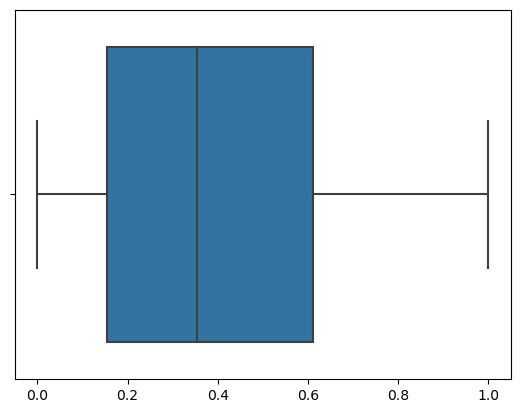

In [9]:
sns.boxplot(x = x_normalized)
plt.show()

In [10]:
pca = PCA()
pca.fit_transform(x_normalized)
cum_var = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cum_var >= 0.95)+1
print("number of components needed to retain 95% of the data: ",num_components)

number of components needed to retain 95% of the data:  11


In [11]:
pca2 = PCA(n_components= num_components)
x_reduced = pca2.fit_transform(x_normalized)
print('x shape after reduction: ', x_reduced.shape)

x shape after reduction:  (568630, 11)


In [12]:
x_train , x_test, y_train , y_test = train_test_split(x_reduced,y,train_size = 0.9)
print("x_train shape:" , x_train.shape)
print("y_train shape:" , y_train.shape)
print("x_test shape:" , x_test.shape)
print("y_test shape:" , y_test.shape)

x_train shape: (511767, 11)
y_train shape: (511767,)
x_test shape: (56863, 11)
y_test shape: (56863,)


<Axes: xlabel='Class', ylabel='count'>

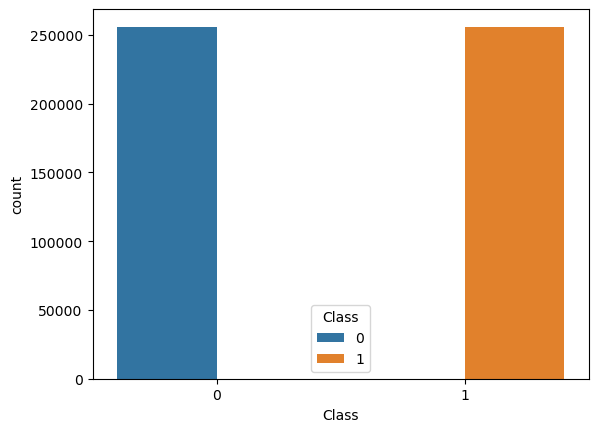

In [13]:
sns.countplot(x = y_train, hue = y_train)

<Axes: xlabel='Class', ylabel='count'>

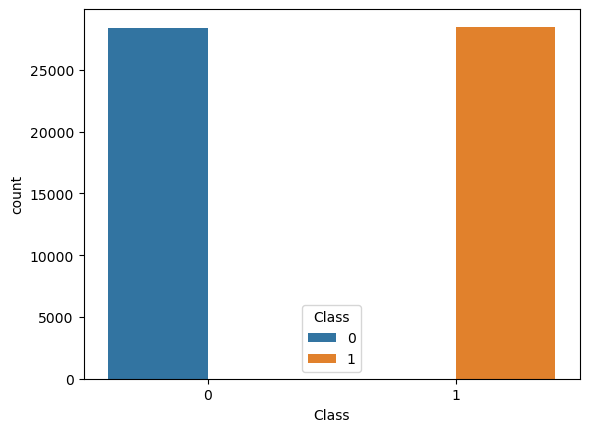

In [14]:
sns.countplot(x = y_test, hue = y_test)

# Apply Models

#### KNN Model

In [15]:
k = 10
neighbors = []
accuracy = []

for i in range(k):
    knn = KNeighborsClassifier(n_neighbors=i+1, weights='distance', metric='euclidean')
    knn = knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    neighbors.append(i+1)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

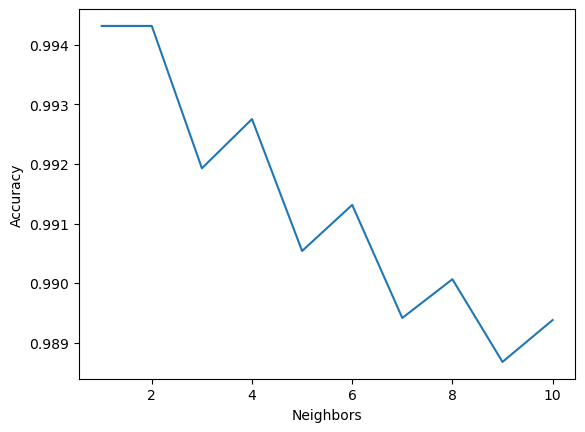

In [16]:
plt.plot(neighbors, accuracy)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
knn = knn.fit(x_train, y_train)

In [17]:
y_pred = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  98.93779786504405


In [18]:
pd.DataFrame({"Predict":y_pred,"Actual":y_test})

,Predict,Actual
453292,1,1
542686,1,1
345051,1,1
292057,1,1
363164,1,1
...,...,...
113290,0,0
274800,0,0
130954,0,0
422792,1,1


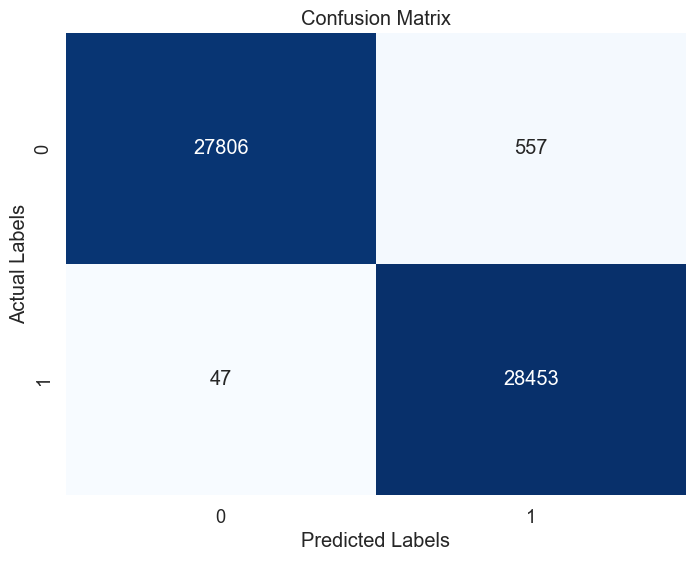

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

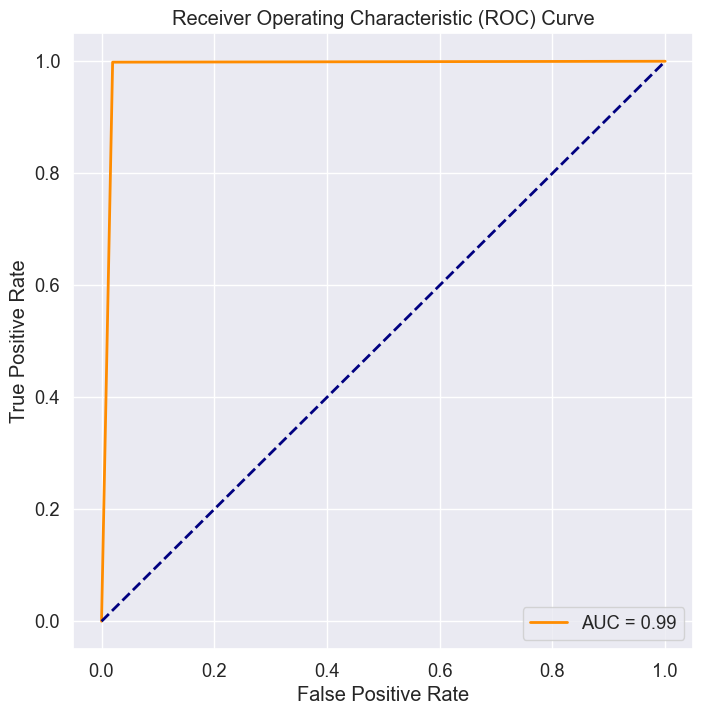

In [20]:
df = pd.DataFrame({"Predict": y_pred, "Actual": y_test})
df = df.sort_values(by='Predict', ascending=False)

fpr, tpr, thresholds = roc_curve(df['Actual'], df['Predict'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [22]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9895350500521883
Recall: 0.9893779786504405


#### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

param_range = range(1, 11)
param_values = []
accuracy_scores = []

for param in param_range:
    dt = DecisionTreeClassifier(max_depth=param, random_state=42)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    param_values.append(param)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))


In [24]:
y_pred = dt.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  96.2928442044915


In [25]:
pd.DataFrame({"Predict":y_pred,"Actual":y_test})

,Predict,Actual
453292,1,1
542686,1,1
345051,1,1
292057,1,1
363164,1,1
...,...,...
113290,0,0
274800,0,0
130954,0,0
422792,1,1


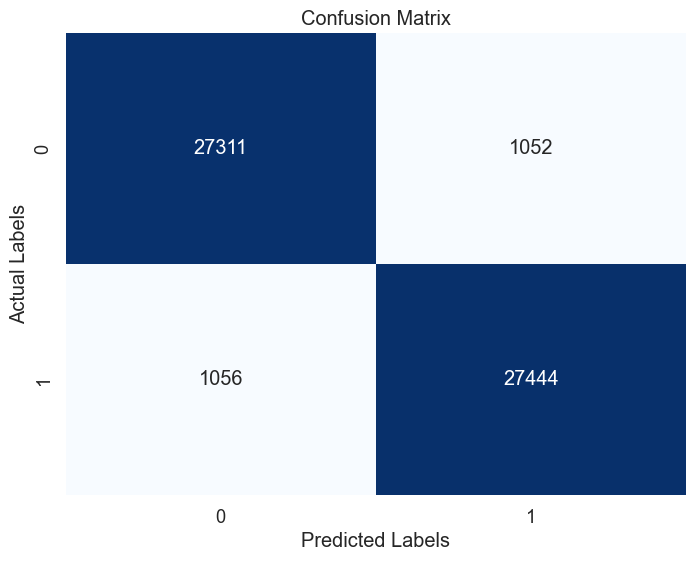

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

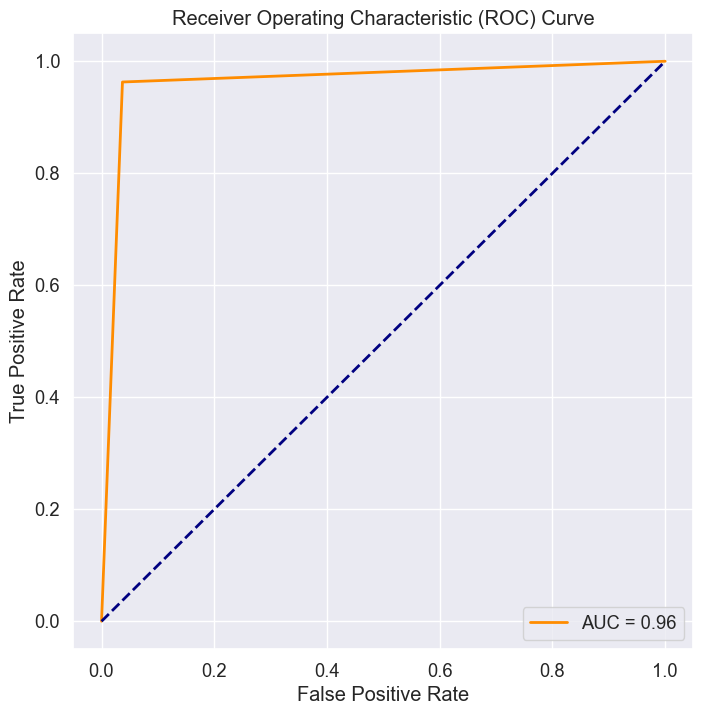

In [27]:
df = pd.DataFrame({"Predict": y_pred, "Actual": y_test})
df = df.sort_values(by='Predict', ascending=False)

fpr, tpr, thresholds = roc_curve(df['Actual'], df['Predict'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [28]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9629284637738049
Recall: 0.962928442044915


#### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

param_range = range(1, 11)
param_values = []
accuracy_scores = []

for param in param_range:
    rf = RandomForestClassifier(n_estimators=param, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    param_values.append(param)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))


In [30]:
y_pred = rf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  99.93668993897613


In [31]:
pd.DataFrame({"Predict":y_pred,"Actual":y_test})

,Predict,Actual
453292,1,1
542686,1,1
345051,1,1
292057,1,1
363164,1,1
...,...,...
113290,0,0
274800,0,0
130954,0,0
422792,1,1


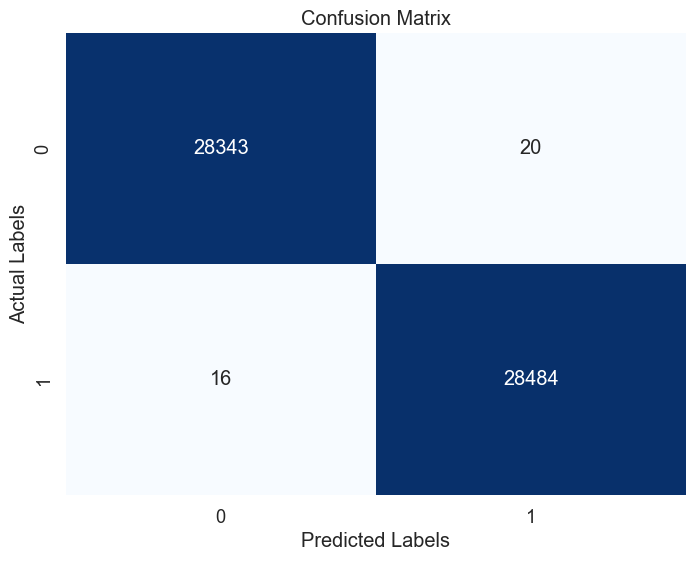

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

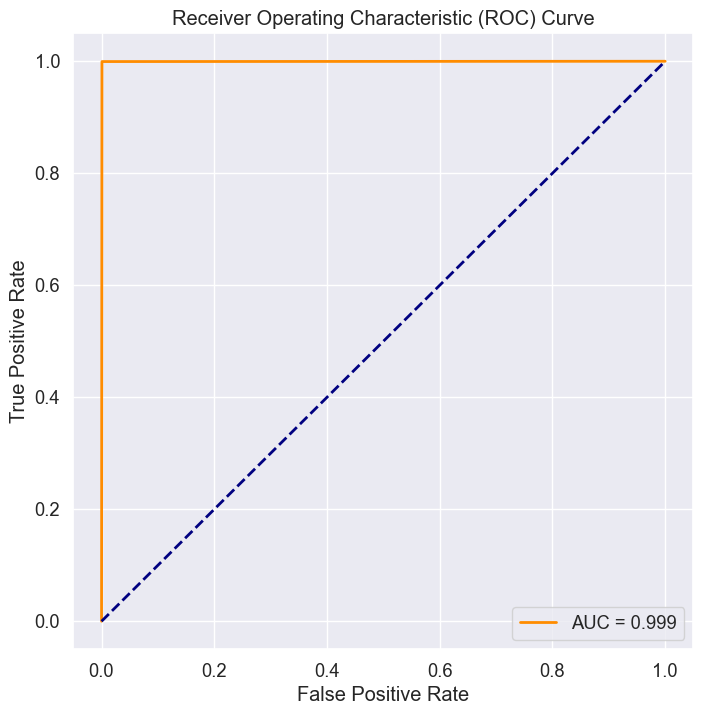

In [35]:
df = pd.DataFrame({"Predict": y_pred, "Actual": y_test})
df = df.sort_values(by='Predict', ascending=False)

fpr, tpr, thresholds = roc_curve(df['Actual'], df['Predict'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [36]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9993669090593968
Recall: 0.9993668993897613


#### Support Vector Machine (SVM) classifier 

In [43]:
from sklearn.svm import SVC

param_range = [1, 10]
param_values = []
accuracy_scores = []

for param in param_range:
    svm = SVC(C=param, kernel='linear', random_state=42)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    param_values.append(param)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))


In [44]:
y_pred = svm.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  94.30912895907709


In [45]:
pd.DataFrame({"Predict":y_pred,"Actual":y_test})

,Predict,Actual
453292,1,1
542686,1,1
345051,1,1
292057,1,1
363164,1,1
...,...,...
113290,0,0
274800,0,0
130954,0,0
422792,1,1


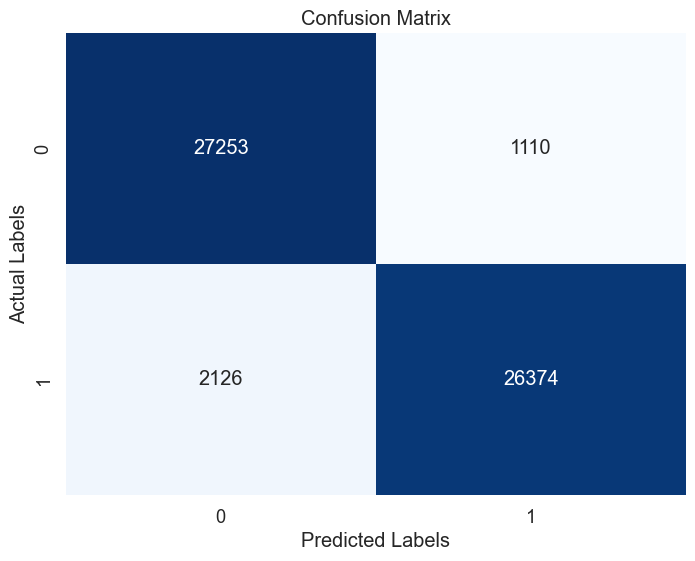

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

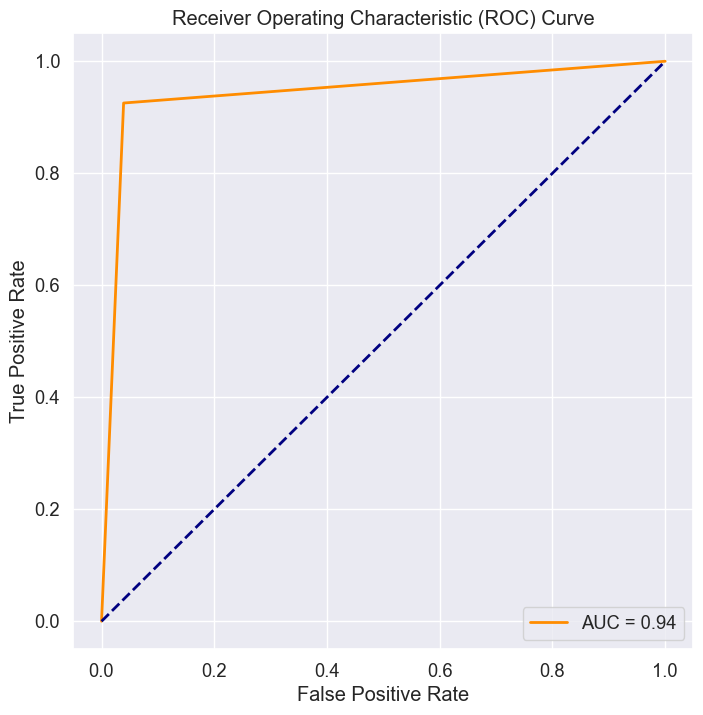

In [47]:
df = pd.DataFrame({"Predict": y_pred, "Actual": y_test})
df = df.sort_values(by='Predict', ascending=False)

fpr, tpr, thresholds = roc_curve(df['Actual'], df['Predict'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [48]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.943662647407366
Recall: 0.9430912895907708


####  Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

param_range = [50, 100, 150, 200]
param_values = []
accuracy_scores = []

for param in param_range:
    gbc = GradientBoostingClassifier(n_estimators=param, random_state=42)
    gbc.fit(x_train, y_train)
    y_pred = gbc.predict(x_test)
    param_values.append(param)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))


In [38]:
y_pred = gbc.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  96.68501486027822


In [39]:
pd.DataFrame({"Predict":y_pred,"Actual":y_test})

,Predict,Actual
453292,1,1
542686,1,1
345051,1,1
292057,1,1
363164,1,1
...,...,...
113290,0,0
274800,0,0
130954,0,0
422792,1,1


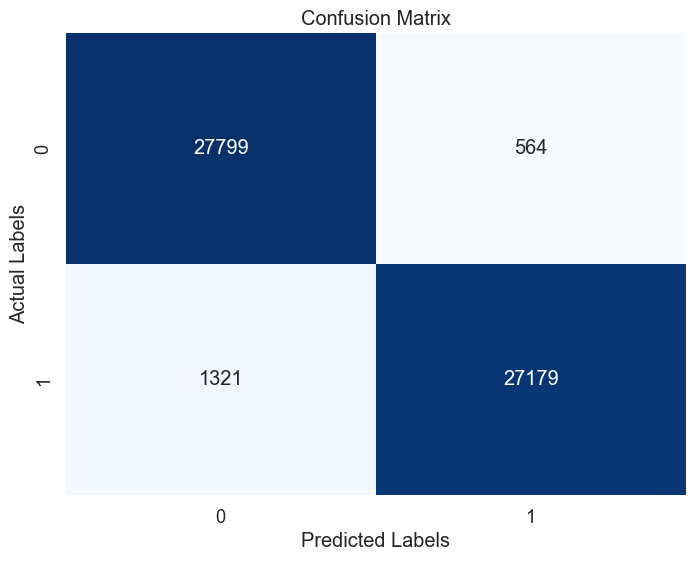

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

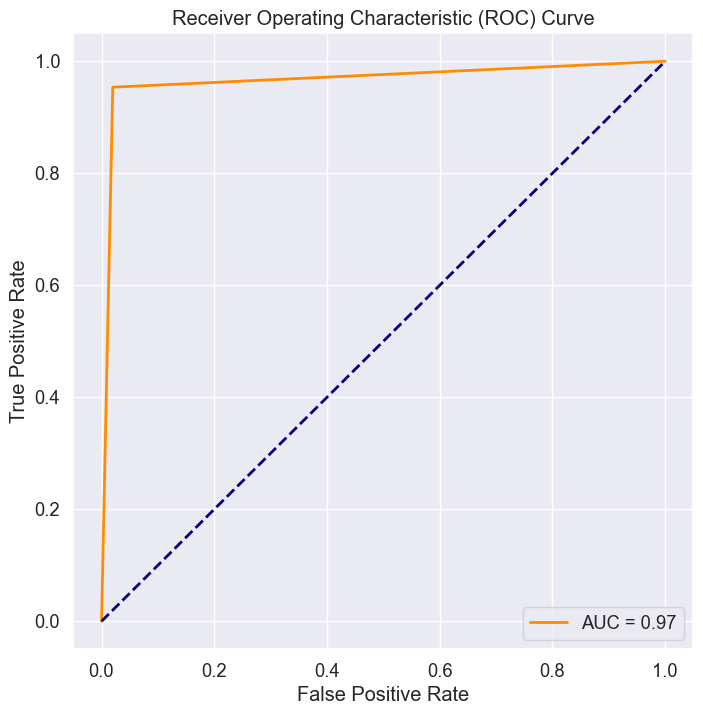

In [41]:
df = pd.DataFrame({"Predict": y_pred, "Actual": y_test})
df = df.sort_values(by='Predict', ascending=False)

fpr, tpr, thresholds = roc_curve(df['Actual'], df['Predict'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [42]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9671834261434586
Recall: 0.9668501486027822


#### Pickling

In [49]:
rfPickle = open('creditCard-fraud-detection(RandomForest)', 'wb')

pickle.dump(rf, rfPickle)

rfPickle.close()

#### Inference

Inference: Random Forest is a strong and versatile algorithm for the given Credit_Card_Fraud_Detection_Dataset_2023. Compare to KNN Classifier, Decision Tree Classifier , Support Vector Machine Classifier , Gradient Boosting Classifier.The Precision and Recall value is high compare to the above machine learning algorithms.